In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import pandas_datareader as wb
import matplotlib as plt

#TO DO: 
#create interface

In [2]:
#need to initialize an empty dataframe first

tickerData = {}
tickerData = pd.DataFrame.from_dict(tickerData)
start = '2017-01-01'
end = '2021-10-1'

In [3]:
tickers = ['WY', 'AAPL']

def loadFromYFinance(ticker, start, end):
    stock = wb.DataReader(ticker, 'yahoo', start, end) 
    return stock['Close']

In [4]:
for ticker in tickers:
    tickerData[ticker] = loadFromYFinance(ticker, start, end)

In [5]:
tickerData = pd.DataFrame.from_dict(tickerData)

In [6]:
#test 
print("SIZE OF THE DATAFRAME:", tickerData.shape)
tickerData

SIZE OF THE DATAFRAME: (1196, 2)


,WY,AAPL
Date,,
2017-01-03,30.360001,29.037500
2017-01-04,30.629999,29.004999
2017-01-05,30.950001,29.152500
2017-01-06,30.850000,29.477501
2017-01-09,30.969999,29.747499
...,...,...
2021-09-27,37.099998,145.369995
2021-09-28,36.549999,141.910004
2021-09-29,36.580002,142.830002


In [7]:
tickerData.isnull().sum()

WY      0
AAPL    0
dtype: int64

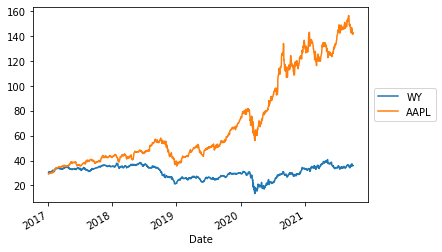

In [8]:
plt1 = tickerData.plot()
plt1.legend(loc="center", bbox_to_anchor=(1.11, 0.5), shadow=False, ncol=1) 

In [9]:
# Iterate over column names to calculate the return on the stock price (standardization)
tickerData_return = tickerData.copy()

for column in tickerData_return.columns:
    tickerData_return[column] = tickerData_return[column] / tickerData_return[column].loc[~tickerData_return[column].isnull()].iloc[0]

In [21]:
tickerData_return

,WY
Date,
2017-01-03,1.000000
2017-01-04,1.008893
2017-01-05,1.019433
2017-01-06,1.016140
2017-01-09,1.020092
...,...
2021-09-27,1.222003
2021-09-28,1.203887
2021-09-29,1.204875


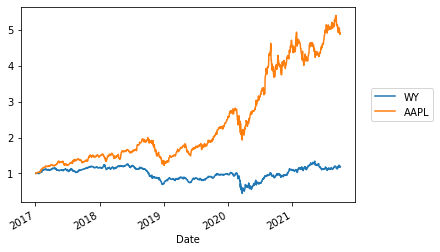

In [10]:
plt2 = tickerData_return.plot()
plt2.legend(loc="center", bbox_to_anchor=(1.14, 0.5), shadow=False, ncol=1) 